['Liste cheat white', 'Liste cheat black', 'Game', 'Elo White', 'Elo Black', 'Score']


c:\Users\james\Documents\chessNN\myenv1\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 32)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,306 (9.01 KB)

 Trainable params: 2,306 (9.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
597/597 - 2s - 4ms/step - accuracy: 0.6386 - loss: 0.6494 - val_accuracy: 0.5002 - val_loss: 0.7247
Epoch 2/40
597/597 - 1s - 2ms/step - accuracy: 0.6562 - loss: 0.6354 - val_accuracy: 0.5002 - val_loss: 0.7237
Epoch 3/40
597/597 - 1s - 2ms/step - accuracy: 0.6562 - loss: 0.6345 - val_accuracy: 0.5002 - val_loss: 0.7213
Epoch 4/40
597/597 - 1s - 2ms/step - accuracy: 0.6561 - loss: 0.6334 - val_accuracy: 0.5002 - val_loss: 0.7230
Epoch 5/40
597/597 - 1s - 2ms/step - accuracy: 0.6561 - loss: 0.6325 - val_accuracy: 0.5324 - val_loss: 0.7151
Epoch 6/40
597/597 - 1s - 2ms/step - accuracy: 0.6561 - loss: 0.6316 - val_accuracy: 0.5398 - val_loss: 0.7147
Epoch 7/40
597/597 - 1s - 2ms/step - accuracy: 0.6561 - loss: 0.6308 - val_accuracy: 0.5352 - val_loss: 0.7104
Epoch 8/40
597/597 - 1s - 2ms/step - accuracy: 0.6571 - loss: 0.6300 - val_accuracy: 0.5326 - val_loss: 0.7121
Epoch 9/40
597/597 - 1s - 2ms/step - accuracy: 0.6661 - loss: 0.6294 - val_accuracy: 0.5319 - val_loss: 0.7087
E

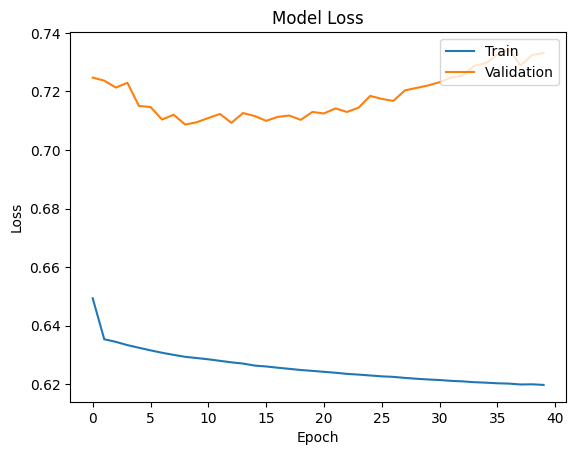

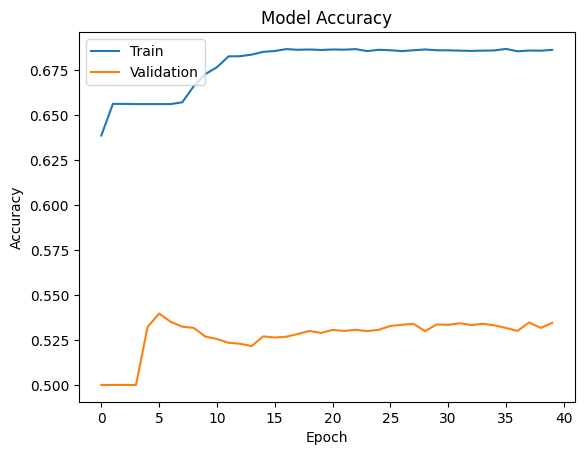

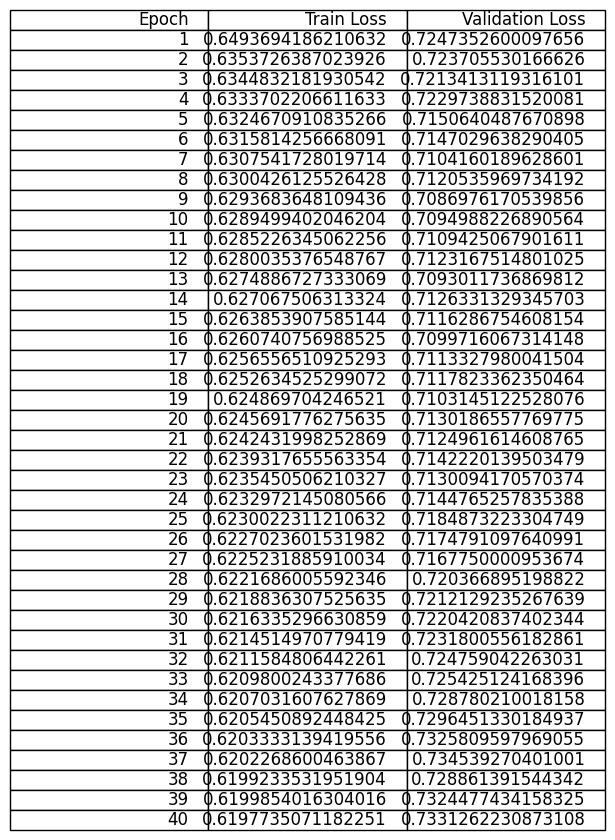

In [28]:
import csv

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

train_cheat_labels = []
train_cheat_elo = []
validate_cheat_labels = []
validate_cheat_elo = []

def ifCheatWhite(name):

    isCheat = 0


    player1moves = name[0]

    for i in player1moves:
        if i == '1':
            isCheat = 1


    #if isCheat == 1:
        #print("Cheated")
    #else:
        #print("Did not Cheat")

    return isCheat


def ifCheatBlack(name):
    isCheat = 0


    player1moves = name[1]

    for i in player1moves:
        if i == '1':
            isCheat = 1

    return isCheat


with open('Games.csv', 'r') as file:
    csv_reader = csv.reader(file)
    
    header = next(csv_reader, None)
    if header:
        print(header)

    for i in range(20000):
        row = next(csv_reader, None)
        if row:
            #train_cheat_labels.append(greet(row))
            elo = row[3]
            elo_valid = row[4]
            #print(elo_valid)

            if elo != '-1':
                train_cheat_elo.append(elo)
                train_cheat_labels.append(ifCheatWhite(row))

            if elo_valid != '-1':
                validate_cheat_elo.append(elo_valid)
                validate_cheat_labels.append(ifCheatBlack(row)) 



    
#for x in train_cheat_labels:
    #print(x)

#train_cheat_labels = np.array(train_cheat_labels)

train_cheat_labels = np.array(train_cheat_labels)
train_cheat_elo = np.array(train_cheat_elo)
train_labels, train_samples = shuffle(train_labels, train_samples)

validate_cheat_labels = np.array(validate_cheat_labels)
validate_cheat_elo = np.array(validate_cheat_elo)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_elo = scaler.fit_transform(train_cheat_elo.reshape(-1,1))

scaler = MinMaxScaler(feature_range=(0,1))
scaled_validate_elo = scaler.fit_transform(validate_cheat_elo.reshape(-1,1))

valid_set = (scaled_validate_elo,validate_cheat_labels)

#scale the data
#for i in scaled_train_samples:
    #print(i)

cheat_model = Sequential([
    Dense(units=32, input_shape=(1,),activation='relu'),
    Dense(units=64, activation='relu'),
    Dense(units=2, activation='softmax')
])

cheat_model.summary()

cheat_model.compile(optimizer=Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = cheat_model.fit(x=scaled_train_elo, y=train_cheat_labels, validation_data= valid_set ,batch_size=32, epochs=40, shuffle=True, verbose=2)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

train_loss = history.history['loss']
val_loss = history.history['val_loss']

fig, ax = plt.subplots()
ax.set_axis_off()

table_data = [
    ['Epoch', 'Train Loss', 'Validation Loss'],
    *[[i + 1, train_loss[i], val_loss[i]] for i in range(len(train_loss))]
]

table = ax.table(cellText=table_data, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2) 

plt.show()

